# CEE 690-02

# Environmental Spatial Data Analysis

# Lecture 22

# Logistics

* Homework #7 due today
* Revised proposal due today
* Homework #8 will be up on Saturday

# Outline

* Ordinary Kriging 
* Semivariogram/covariance

# Ordinary Kriging: Kriging with an unknown mean

# Linear combination of observations

$$Z^* \approx Z_0$$
$$Z^* = \sum_{i=1}^N w_i Z_i$$

But this time we don't assume to know $\mathbb{E}(Z_0) = \mu$.

# Let's revisit the idea of the mean squared error (MSE)

$$\text{MSE} = \mathbb{E}(Z^* - Z_0)^2 = \text{Var}(Z^* - Z_0) + \left[\mathbb{E}(Z^* - Z_0)\right]^2 $$

Let's expand that second term:

$$\left[\mathbb{E}(Z^* - Z_0)\right]^2 = \left[\mathbb{E}(Z^*) -  \mathbb{E}(Z_0)\right]^2$$

Let's assume a constant (yet unknown) mean $\mu$ such that $\mathbb{E}(Z_0) = \mathbb{E}(Z_i) = \mu$

# Unbiased estimator?

$$\left[\mathbb{E}(Z^* - Z_0)\right]^2 = \left[\mathbb{E}(Z^*) -  \mathbb{E}(Z_0)\right]^2$$

If we want to assemble an unbiased estimator (which we want!), what should $\mathbb{E}(Z^*)$ be?

$$\mathbb{E}(Z^*) = \mathbb{E}(Z_0) = \mu$$

Thus:

$$\mathbb{E}(Z^*) = \mathbb{E}\left(\sum_{i=1}^Nw_iZ_i\right) = \sum_{i=1}^Nw_i\mathbb{E}(Z_i) = \mu$$

# Let's think about this...

To have an unbiased estimator, we need to ensure that:

$$\sum_{i=1}^Nw_i\mathbb{E}(Z_i) = \mu$$

But we already know that $\mathbb{E}(Z_i) = \mu$ for all observations $Z_i$. Therefore the following must be true.

$$\sum_{i=1}^Nw_i\mu = \mu$$

How do we ensure that equality is maintained?

$$\sum_{i=1}^Nw_i = 1$$

And that is the biggest change when going from Simple to Ordinary Kriging. Note that this assumption is not necessary in Simple Kriging since the mean is assumed to be already known.

# Let's combine this constraint with our Simple Kriging system

But first, let's see if we made any progress since Tuesday...

# Detour: Let's try this again...

* $\text{Cov}(Z_i,Z_j)$
* $\text{Cov}(Z_i,Z_0)$
* $\text{Var}(Z_0)$

# Back to Ordinary Kriging: Let's combine the sum of weights constraint with our Simple Kriging system

1. $$\mathbf{\Sigma} \mathbf{w} = \mathbf{c}$$
2. $$\sum_{i=1}^Nw_i = 1$$

To better understand this, we can expand the two (assume that $C_{ij} = \text{Cov}(Z_i,Z_j)$:

1. $$\begin{bmatrix} 
    C_{11} & C_{12} & \dots & C_{1N}\\
    C_{21} & C_{22} & \ddots & C_{2N}\\
    \vdots & \ddots & \ddots & \vdots\\
    C_{N1} & C_{N1} & \dots & C_{NN}\\
    \end{bmatrix}
    \begin{bmatrix} w_1 \\ w_2 \\ \vdots \\ w_N\end{bmatrix}
    =
    \begin{bmatrix} C_{10} \\ C_{20} \\ \vdots \\ C_{N0}\end{bmatrix}$$


2. $$\begin{bmatrix} 1 & 1 & \dots & 1\end{bmatrix}\begin{bmatrix} w_1 \\ w_2 \\ \vdots \\ w_N\end{bmatrix} = 1$$

# Combined system to solve everything at once?

$$\begin{bmatrix} 
    C_{11} & C_{12} & \dots & C_{1N}\\
    C_{21} & C_{22} & \ddots & C_{2N}\\
    \vdots & \ddots & \ddots & \vdots\\
    C_{N1} & C_{N1} & \dots & C_{NN}\\
    1 & 1 & \dots & 1
    \end{bmatrix}
    \begin{bmatrix} w_1 \\ w_2 \\ \vdots \\ w_N\end{bmatrix}
    =
    \begin{bmatrix} C_{10} \\ C_{20} \\ \vdots \\ C_{N0} \\ 1\end{bmatrix}$$
    
* How many equations do we have?
* How many unknowns do we have?
* Why is this problematic?

## What can we do?

# Solution: Method of Lagrange multipliers

This will probably feel a bit "hand wavy" as I skipped a few steps, if you want to learn the details just look up Ordinary Kriging derivation.

Let's take our definition of MSE for the Simple Kriging case:


$$\mathbb{E}[(Z^* - Z_0)^2] = \sum_{i=1}^N \sum_{j=1}^N w_i w_j \text{Cov}(Z_i,Z_j) - 2\sum_{i=1}^N w_i \text{Cov}(Z_i,Z_0) + \text{Var}(Z_0)$$

And then add another term at the end:

$$Q = \sum_{i=1}^N \sum_{j=1}^N w_i w_j \text{Cov}(Z_i,Z_j) - 2\sum_{i=1}^N w_i \text{Cov}(Z_i,Z_0) + \text{Var}(Z_0) + 2\lambda\left(\sum_{i=1}^Nw_i - 1\right)$$

We will see very soon why this helps us.

# Minimize MSE to find optimal weights

1. Partial derivative with respect to $w_i$:

$$\frac{\partial Q}{\partial w_i} = 2\sum_{j=1}^Nw_j\text{Cov}(Z_i,Z_j) - 2\text{Cov}(Z_i,Z_0) + 2\lambda$$

2. Partial derivative with respect to $\lambda$:

$$\frac{\partial Q}{\partial \lambda} = 2\left(\sum_{i=1}^Nw_i - 1\right)$$

By setting the resulting equations to 0, simplifying, and rearranging, we construct the Ordinary Kriging system:

$$\sum_{j=1}^Nw_j\text{Cov}(Z_i,Z_j) + \lambda = \text{Cov}(Z_i,Z_0)$$

$$\sum_{i=1}^Nw_i = 1$$

Which in matrix form looks like:

$$\begin{bmatrix} 
    C_{11} & C_{12} & \dots & C_{1N} & 1\\
    C_{21} & C_{22} & \ddots & C_{2N} & 1\\
    \vdots & \ddots & \ddots & \vdots & \vdots\\
    C_{N1} & C_{N1} & \dots & C_{NN} & 1\\
    1 & 1 & \dots & 1 & 0
    \end{bmatrix}
    \begin{bmatrix} w_1 \\ w_2 \\ \vdots \\ w_N \\ \lambda\end{bmatrix}
    =
    \begin{bmatrix} C_{10} \\ C_{20} \\ \vdots \\ C_{N0} \\ 1\end{bmatrix}$$
    
Or even simpler:

$$\begin{bmatrix}
    \mathbf{\Sigma} & \mathbf{1} \\ 
    \mathbf{1}^T & 0
\end{bmatrix} 
\begin{bmatrix}
    \mathbf{w} \\ \lambda
\end{bmatrix} 
= 
\begin{bmatrix}
    \mathbf{c} \\ 1
\end{bmatrix} 
$$

Or the simplest:

$$\mathbf{\Sigma}'\mathbf{w}' = \mathbf{c}'$$

The point is, we can solve this now.

# MSE of the prediction

Almost identical to that for Simple Kriging with just a minor addition

$$\mathbb{E}[(Z^* - Z_0)^2] = \text{Var}(Z_0) - \sum_{i=1}^N w_i \text{Cov}(Z_i,Z_0) - \lambda$$

# Let's go back to our 1d example

In [2]:
import xarray as xr
import numpy as np
fp = xr.open_rasterio('../Workspace/sand_0_5.tif')
data = np.array(fp[0,:,:])
y = np.array(fp['y'][:])
x = np.array(fp['x'][:])
fp.close()

In [3]:
import sklearn.model_selection
import numpy as np
data1d = data[20,:]
pos = 250*np.arange(data1d.size) + 250.0/2 
X = pos[:,np.newaxis]
y = data1d
(Xt,Xv,yt,yv) = sklearn.model_selection.train_test_split(X,y,test_size=0.8,random_state=2,shuffle=True)

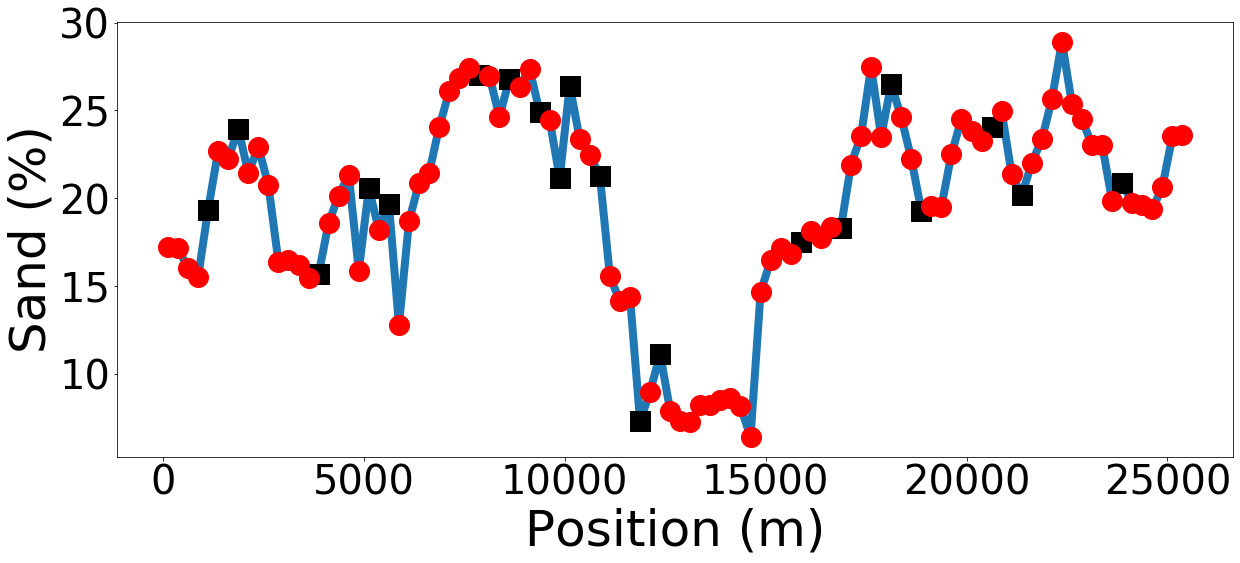

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(20,8))
plt.plot(pos,data1d,lw=8)
plt.plot(Xt[:,0],yt,'ks',markersize=20)
plt.plot(Xv[:,0],yv,'ro',markersize=20)
plt.xticks(fontsize=40)
plt.yticks(fontsize=40)
plt.xlabel('Position (m)',fontsize=50)
plt.ylabel('Sand (%)',fontsize=50)
plt.show()

# Let's implement ordinary kriging

In [230]:
def ordinary_kriging_point(tau,Xt,Xv,zt,var,ipoint):
    #Compute distance matrix between all points and all observations
    h = ((Xt[:].T - Xv[ipoint,:])**2)**0.5
    #Compute covariance of unknown points with data
    c = var*np.exp(-h/tau).T
    #Compute covariance of all observations with each other
    h = ((Xt[:].T - Xt[:])**2)**0.5
    Sigma = var*np.exp(-h/tau)
    #Append the extra information for the langrange multipliers
    Sigma_prime = np.zeros((Sigma.shape[0]+1,Sigma.shape[1]+1))
    Sigma_prime[0:-1,0:-1] = Sigma[:]
    Sigma_prime[-1,0:-1] = 1
    Sigma_prime[0:-1,-1] = 1
    c_prime = np.zeros((c.size+1,1))
    c_prime[0:-1,0] = c[:,0]
    c_prime[-1,0] = 1
    # Solve for the weights
    weights = np.linalg.solve(Sigma_prime,c_prime)
    #Compute zstar
    zstar = np.sum(weights[0:-1,0]*zt)
    #Compute mse 
    mse = var - np.sum(weights[0:-1,0]*c_prime[0:-1,0],axis=0) - weights[-1,0]
    return (zstar,mse)

#Define tau
tau = 10000
#Define the variance for the covariance function
var = np.var(data1d)
#Compute ystart for all missing points
ypred,msepred = [],[]
for ipoint in range(yv.size):
    (zstar,mse) = ordinary_kriging_point(tau,Xt,Xv,yt,var,ipoint)
    ypred.append(zstar)
    msepred.append(mse)
ypred = np.array(ypred)
msepred = np.array(msepred)

SyntaxError: invalid syntax (<ipython-input-230-1cd969171056>, line 7)

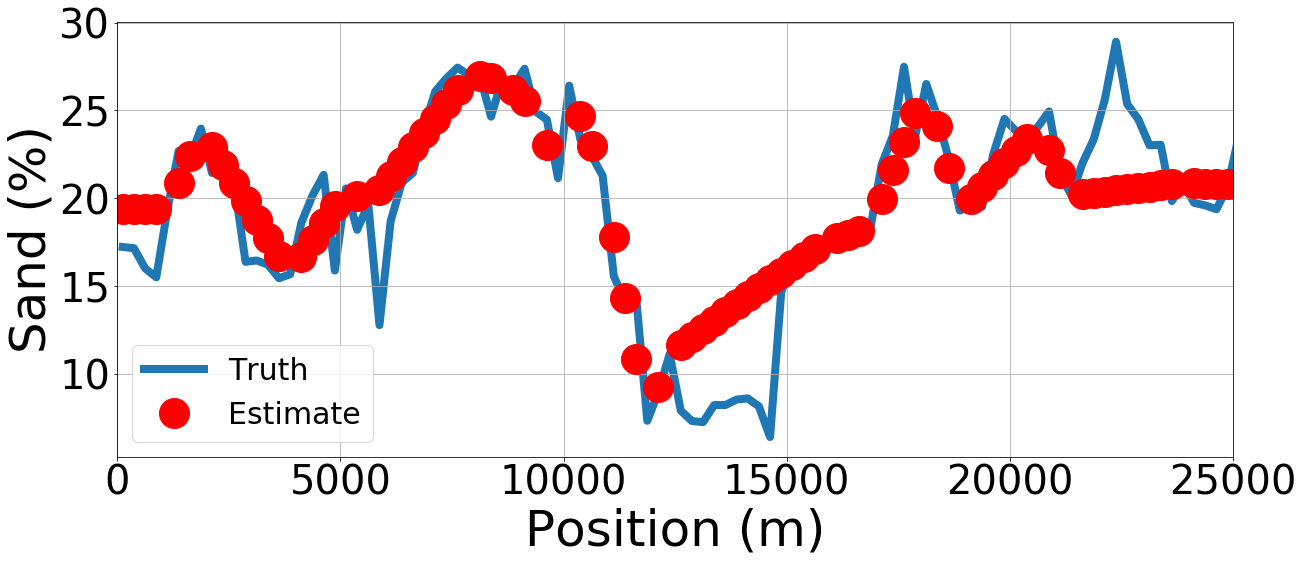

In [231]:
plt.figure(figsize=(20,8))
plt.plot(pos,data1d,lw=8,zorder=1)
plt.plot(Xv[:,0],ypred,'ro',markersize=30)
plt.xticks(fontsize=40)
plt.yticks(fontsize=40)
plt.xlabel('Position (m)',fontsize=50)
plt.ylabel('Sand (%)',fontsize=50)
plt.xlim([0,25000])
plt.title('',fontsize=50)
plt.grid('on')
plt.legend(['Truth','Estimate'],fontsize=30)
plt.show()

In [232]:
print(r'R2: %f' % sklearn.metrics.r2_score(yv,ypred))

R2: 0.713597


**Similar performance to Simple Kriging but without making any assumption about the mean!**

# Add in the predicted uncertainties

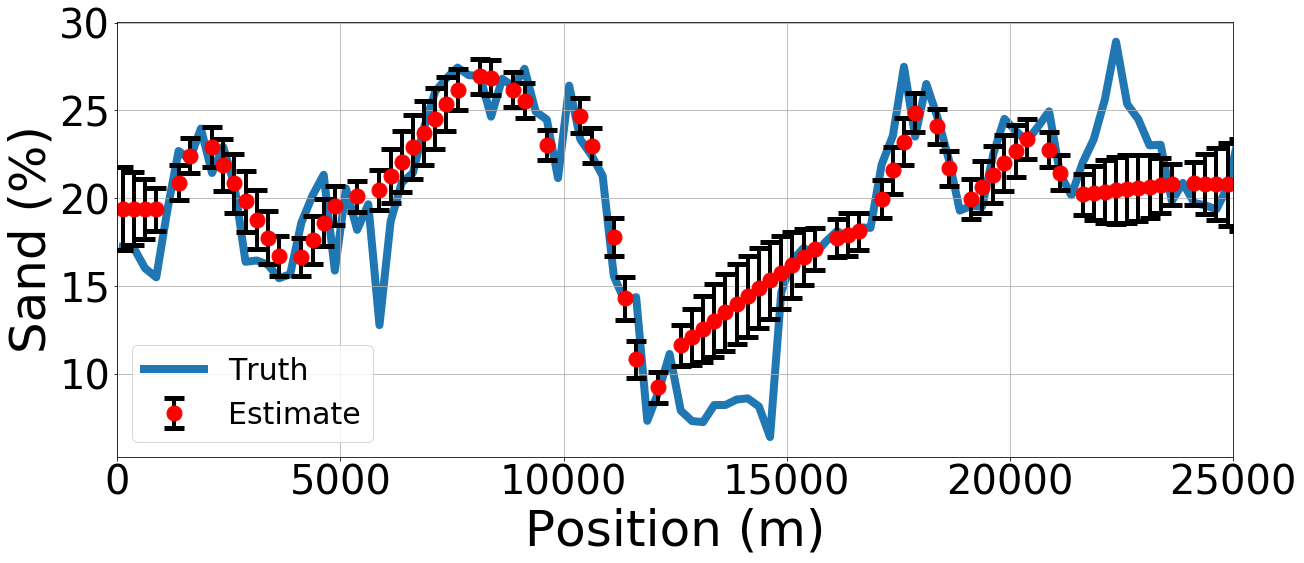

In [233]:
plt.figure(figsize=(20,8))
plt.plot(pos,data1d,lw=8,zorder=1)
argsort = np.argsort(Xv[:,0])
plt.errorbar(Xv[argsort,0],ypred[argsort],yerr=msepred[argsort]**0.5,fmt='ro',
             ecolor='k',elinewidth=4,capthick=5,capsize=10,markersize=15)
plt.xticks(fontsize=40)
plt.yticks(fontsize=40)
plt.xlabel('Position (m)',fontsize=50)
plt.ylabel('Sand (%)',fontsize=50)
plt.xlim([0,25000])
plt.title('',fontsize=50)
plt.grid('on')
plt.legend(['Truth','Estimate'],fontsize=30)
plt.show()

# But how do we determine the covariance function?

We are going to take the semivariogram route. 

# Semivariogram cloud

Let's start with the assumption that our random field $Z$ is stationary (constant mean). 

Next, compute the halved squared difference between any two observations such that:

$$\gamma_c(h) = \frac{1}{2}(z_i - z_j)^2 \;\; \forall \;\; i,j$$

Where $h = h_{i,j} = ||\mathbf{x}_i-\mathbf{x}_j||$

# Semivariogram cloud for our 1d example

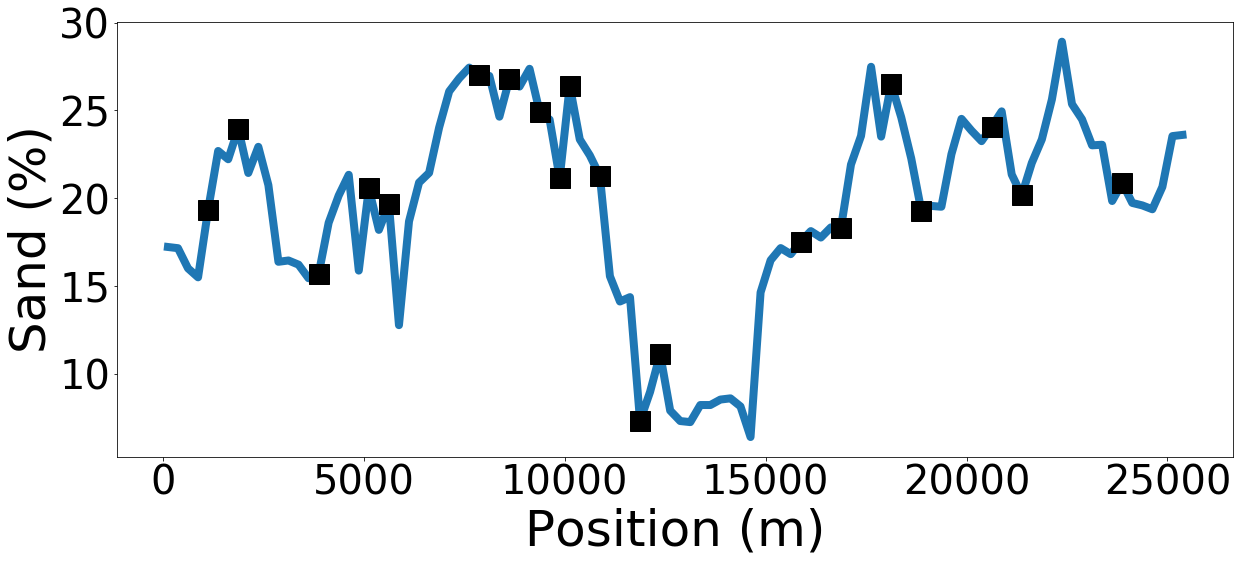

In [9]:
plt.figure(figsize=(20,8))
plt.plot(pos,data1d,lw=8)
plt.plot(Xt[:,0],yt,'ks',markersize=20)
plt.xticks(fontsize=40)
plt.yticks(fontsize=40)
plt.xlabel('Position (m)',fontsize=50)
plt.ylabel('Sand (%)',fontsize=50)
plt.show()

# Compute $\gamma_c$ and create a scatter plot

Let's start by computing this for all the data points (observed and "unobserved"). 

In [328]:
# Compute euclidean distances between the points
h = ((X[:,np.newaxis].T - X[:,np.newaxis])**2)**0.5

# Compute variogram cloud by comparing all points
gamma_c = (data1d[:,np.newaxis].T - data1d[:,np.newaxis])**2/2

#Reshape to 1d arrays
h = h.reshape(h.size)
gamma_c = gamma_c.reshape(gamma_c.size)

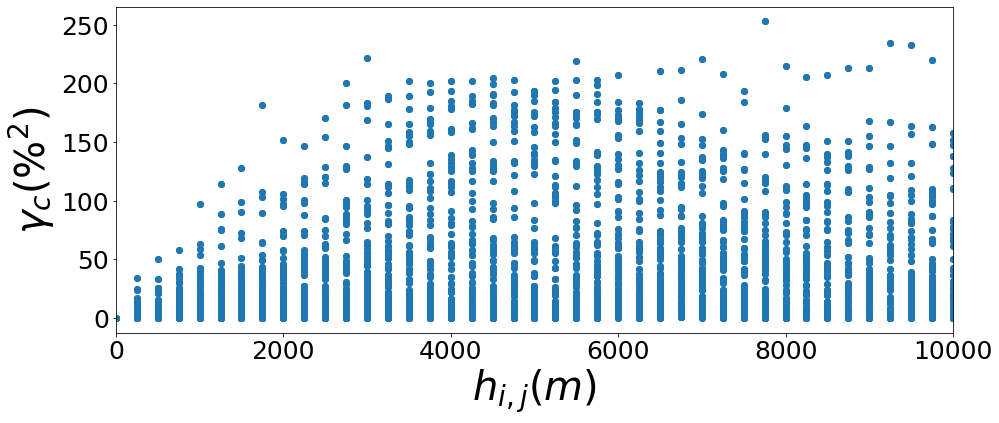

In [329]:
plt.figure(figsize=(15,6))

#Make the scatter plot
plt.scatter(h,gamma_c)

#Let's only consider points that are up to 10000 meters away from each other
plt.xlim([0,10000])

#Pretty up the plot
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.xlabel(r'$h_{i,j} (m)$',fontsize=40)
plt.ylabel(r'$\gamma_c(\%^2)$',fontsize=40)
plt.show()

# Sample semivariogram

To find the average behavior of our cloud semivariogram we need to bin the $\gamma_c$ values.

For a given bin, its edges are given by ($h - \delta$,$h + \delta$) where $h = h_{i,j} = ||\mathbf{x}_i-\mathbf{x}_j||$ and $\delta$ is a user-defined parameter that defines the half bin size.

The sample variogram is then defined as:

$$\hat{\gamma}(h \pm \delta) = \frac{1}{2N_{h \pm \delta}}\sum_{i=1}^{N_{h \pm \delta}}\sum_{j=1}^{N_{h \pm \delta}}(z_i - z_j)^2$$

# Compute sample semivariogram

In [330]:
#Define delta
delta = 250 #m

#Define bin edges
bin_edges = np.linspace(0,10000,10000/delta+1)

#Compute the center of each bin
hd = (bin_edges[1:] + bin_edges[0:-1])/2

#Compute sample semivariogram
gamma_s = []
for i in range(hd.size):
    if i == 0:m = (h >= bin_edges[i]) & (h < bin_edges[i+1])
    else:m = (h > bin_edges[i]) & (h <= bin_edges[i+1])
    tmp = np.mean(gamma_c[m])
    gamma_s.append(tmp)
gamma_s = np.array(gamma_s)

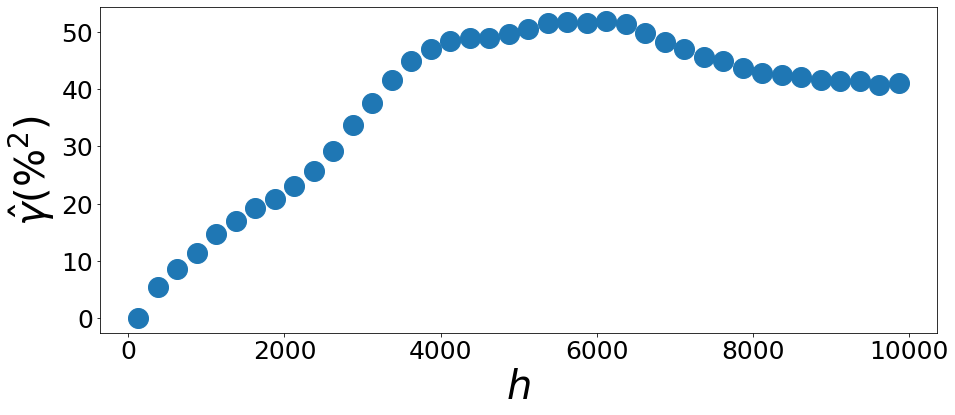

In [331]:
plt.figure(figsize=(15,6))
plt.plot(hd,gamma_s,'o',markersize=20)

#Pretty up the plot
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.xlabel(r'$h$',fontsize=40)
plt.ylabel(r'$\hat{\gamma}(\%^2)$',fontsize=40)
plt.show()

# Understanding the semivariogram

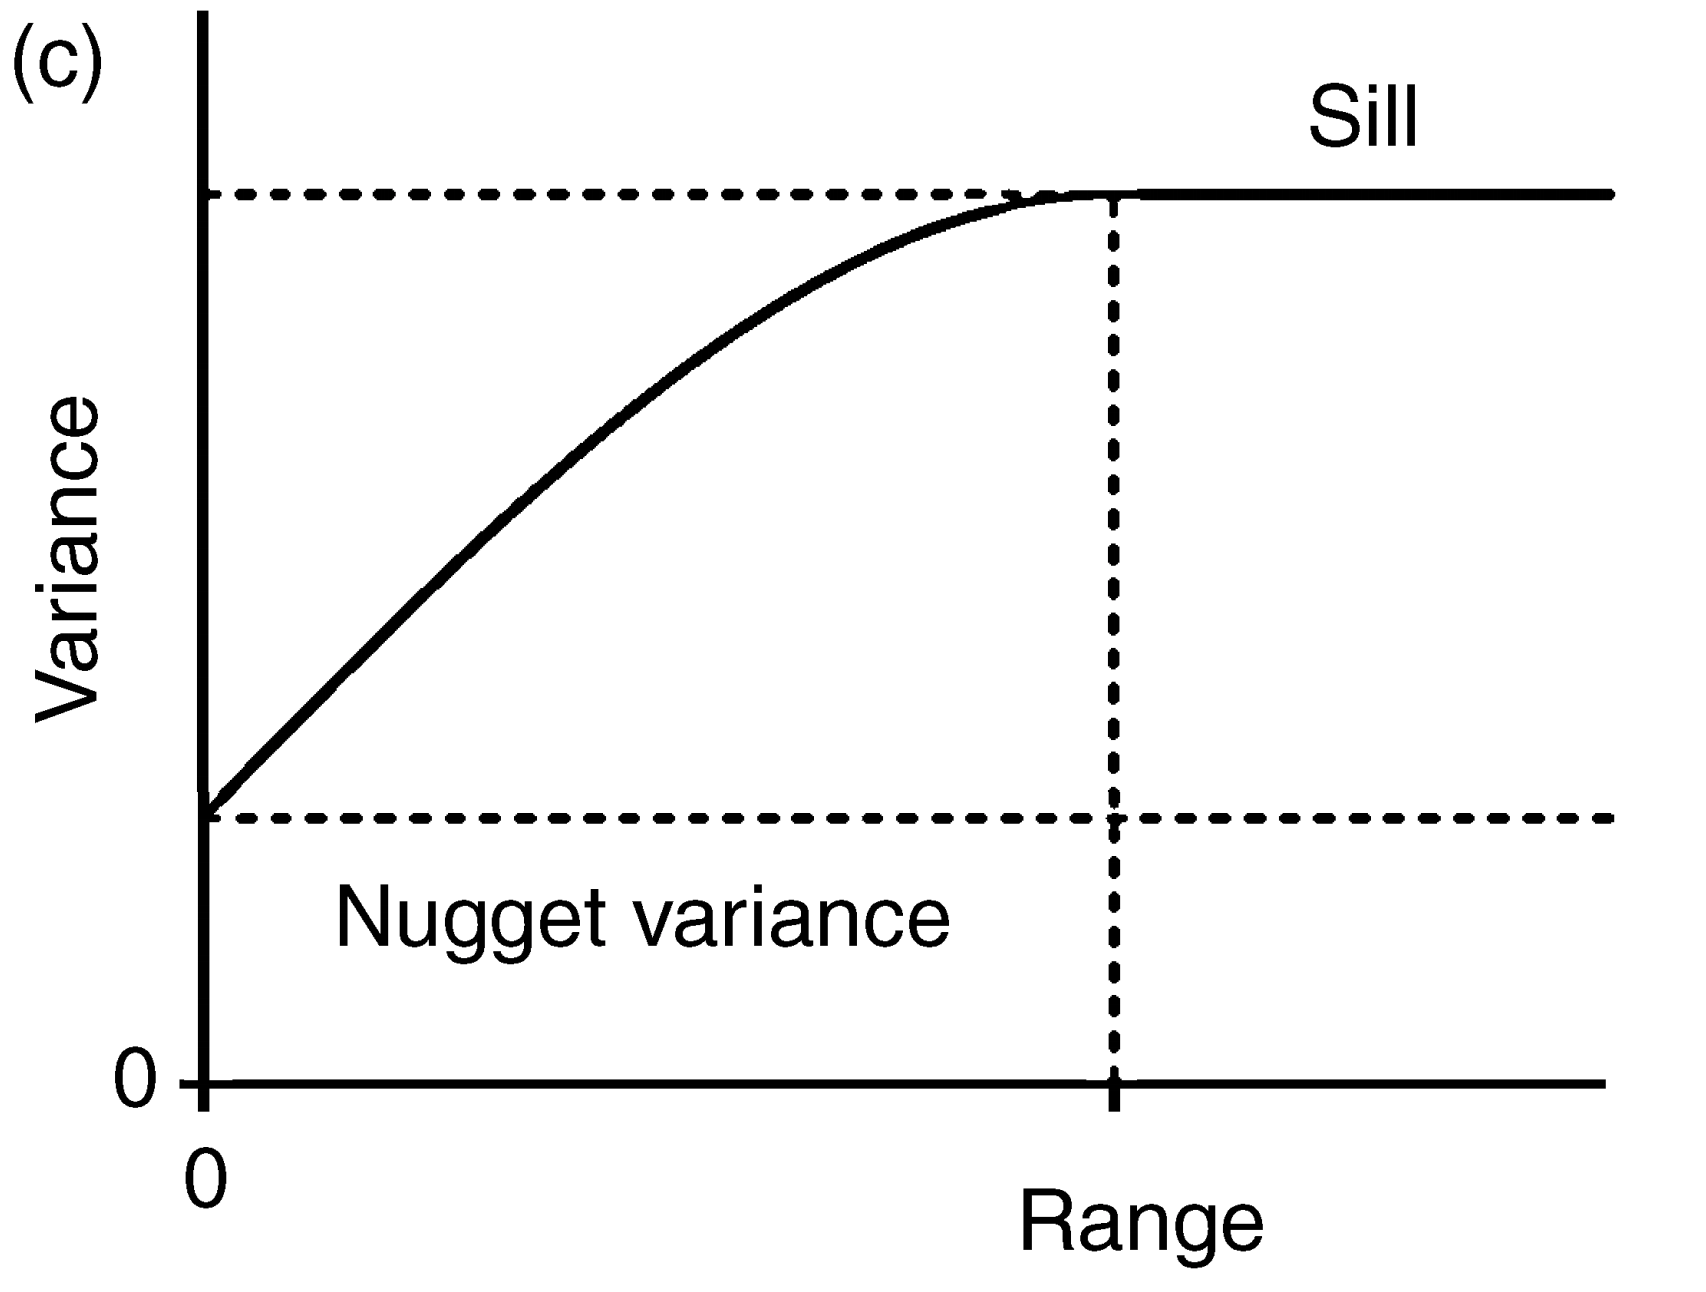

Source: Webster and Oliver, 2007

# What would be the range, sill, and nugget in our example??

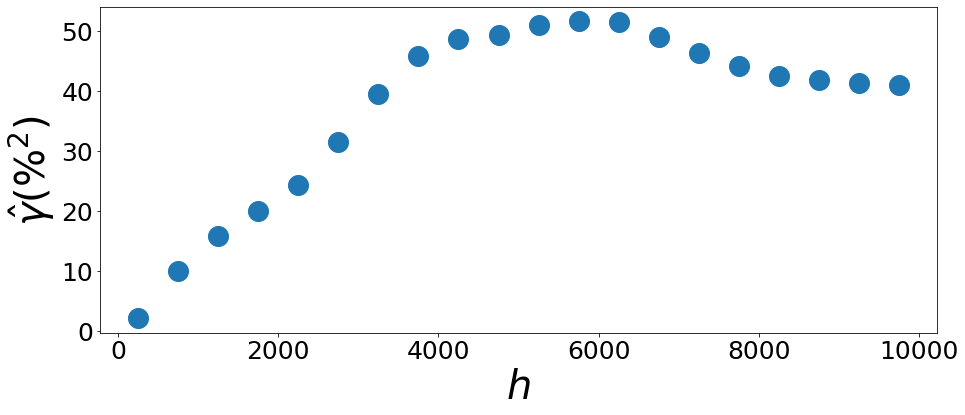

# Modeling the semivariogram

Due to the need for our covariance matrix to be positive semidefinite (i.e., so we can solve the linear system), we generally can't use the sample semivariogram (and its related sample covariance) in Kriging. Instead we have to fit model semivariograms to our sample semivariogram.

A couple of things:

* We are only going to look at bounded models; however, note that there are also unbounded models.
* We are going to assume that the nugget is 0. When needing it, just add a constant to the model semivariograms.

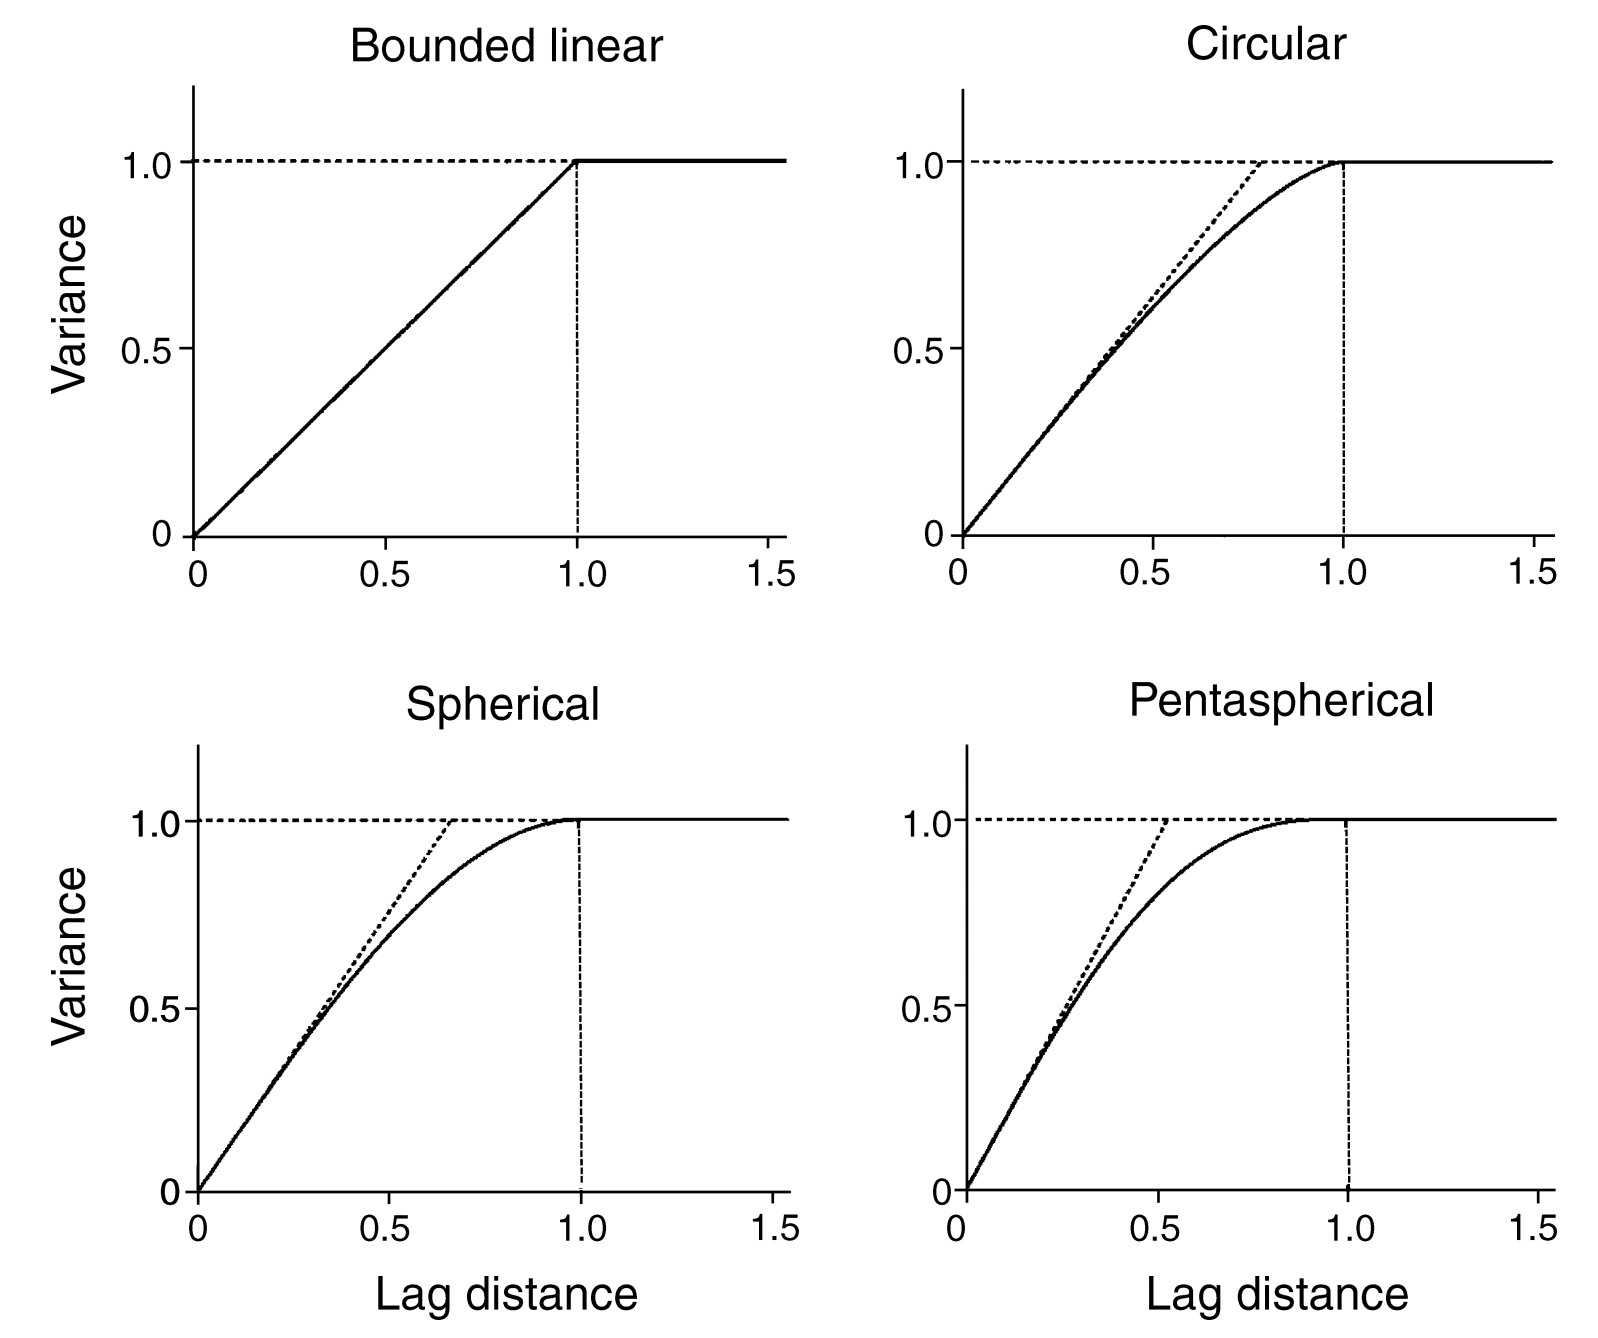

Source: Webster and Oliver, 2007

# Asymptotically bounded semivariograms

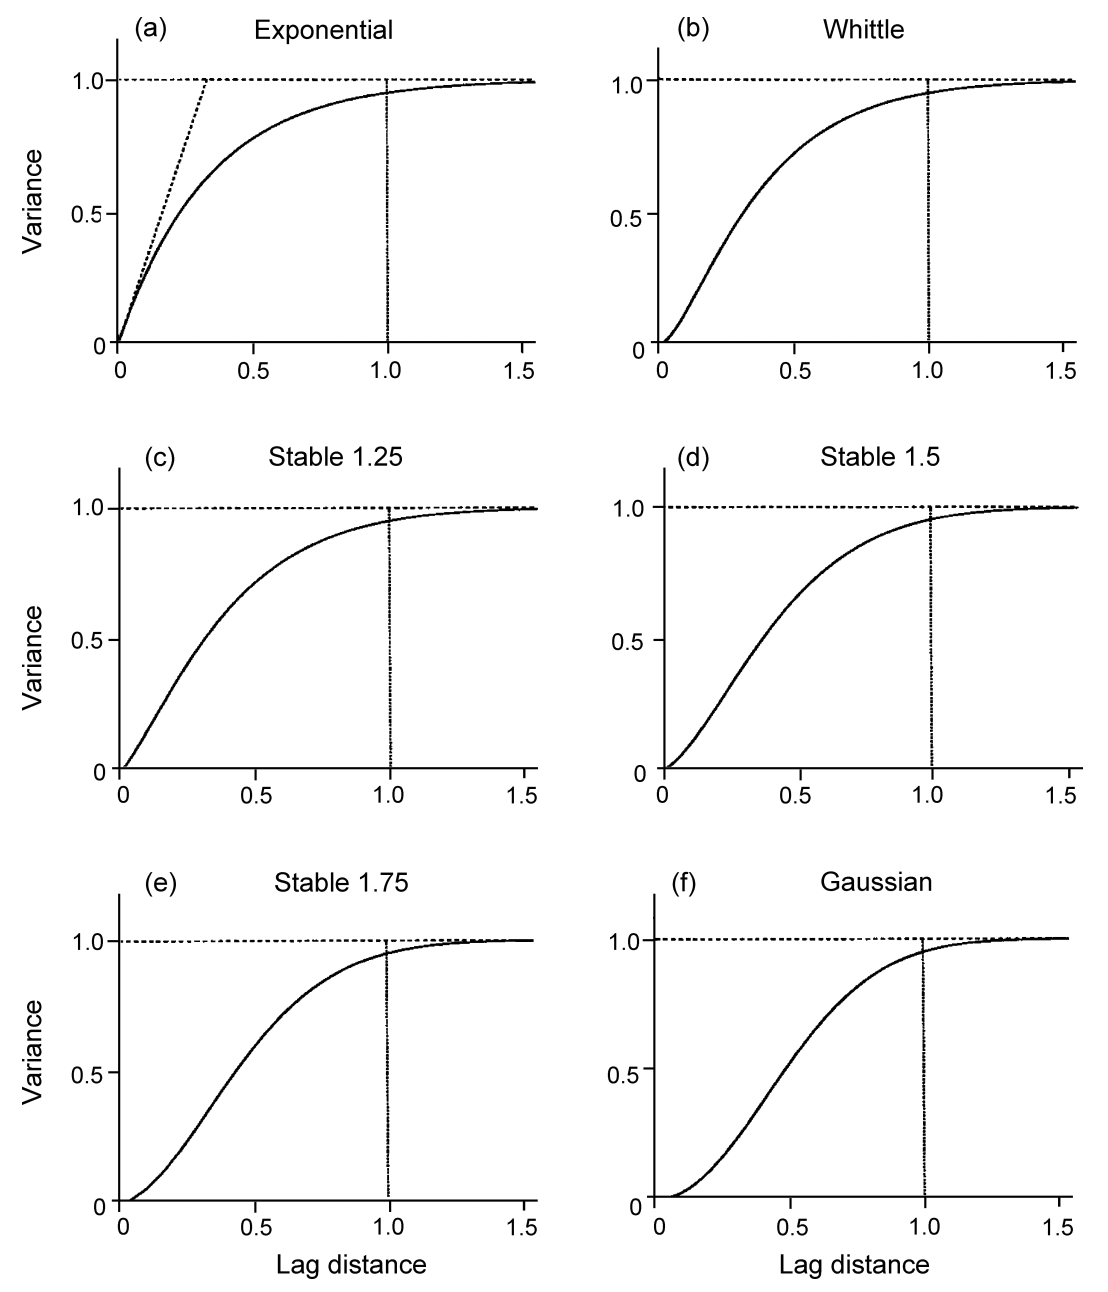

# Let's look at the spherical and exponential models

# Spherical semivariogram

$$\gamma(h) = c\left(\frac{2h}{2a} - \frac{1}{2}\left(\frac{h}{a}\right)^3\right)\;\text{for}\;h \leq a$$

$$\gamma(h) = c\;\text{for}\;h \gt a$$

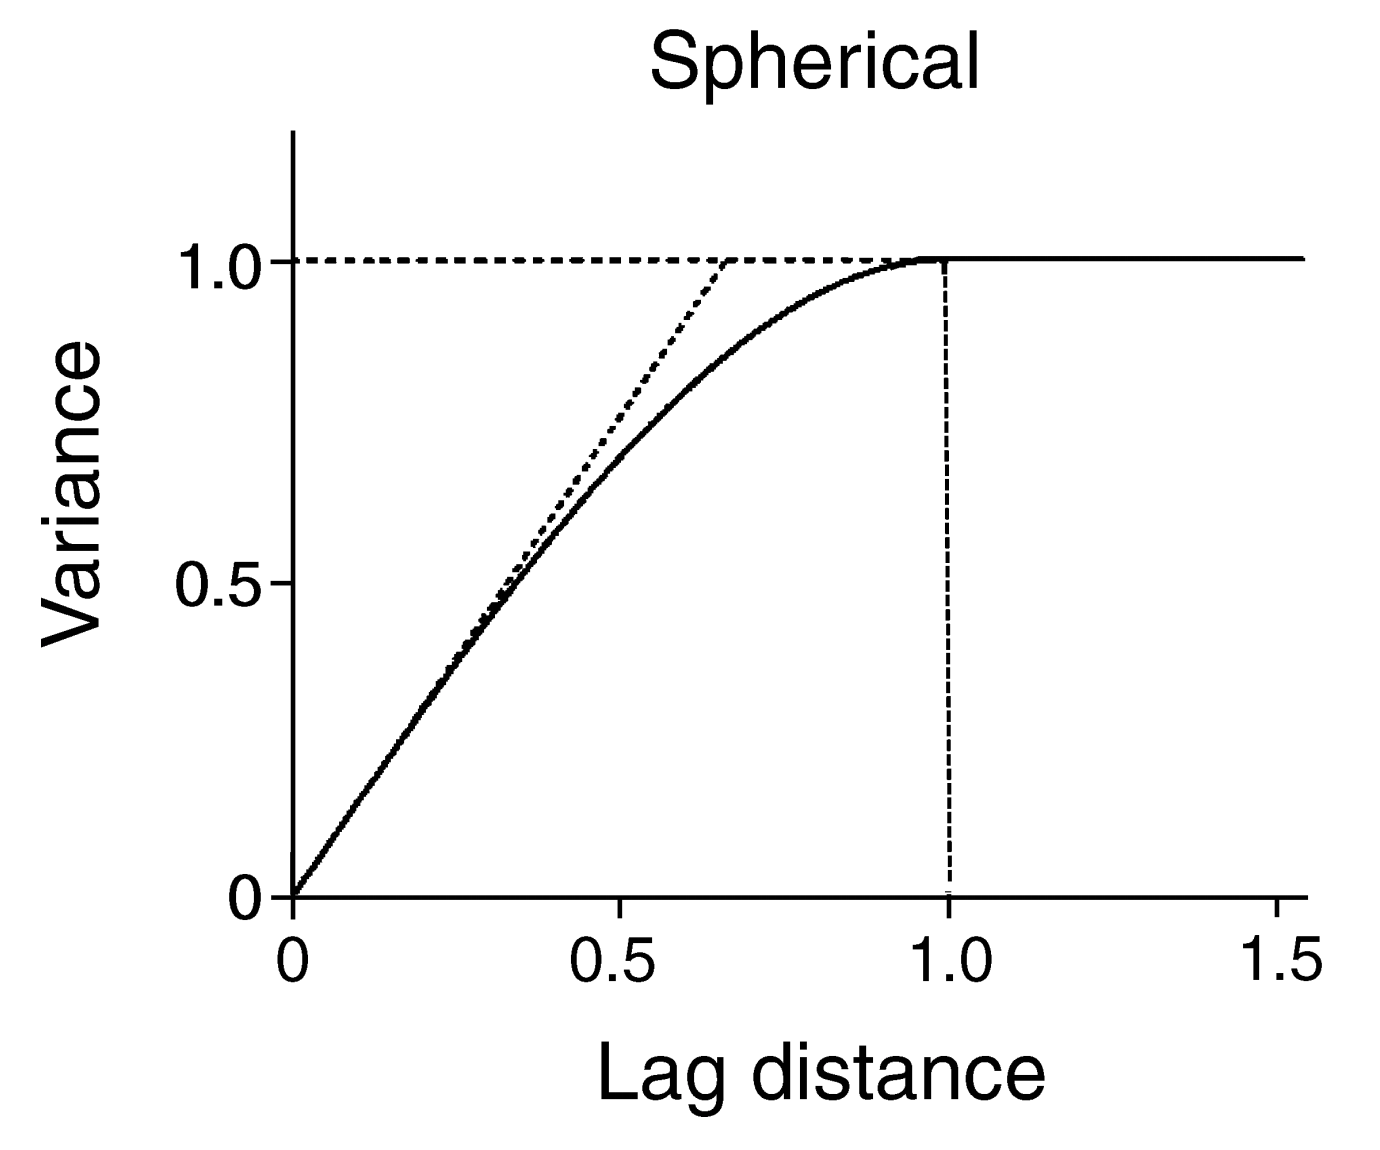

# Exponential semivariogram

$$\gamma(h) = c\left(1 - \text{exp}\left(-\frac{h}{\tau}\right)\right)$$

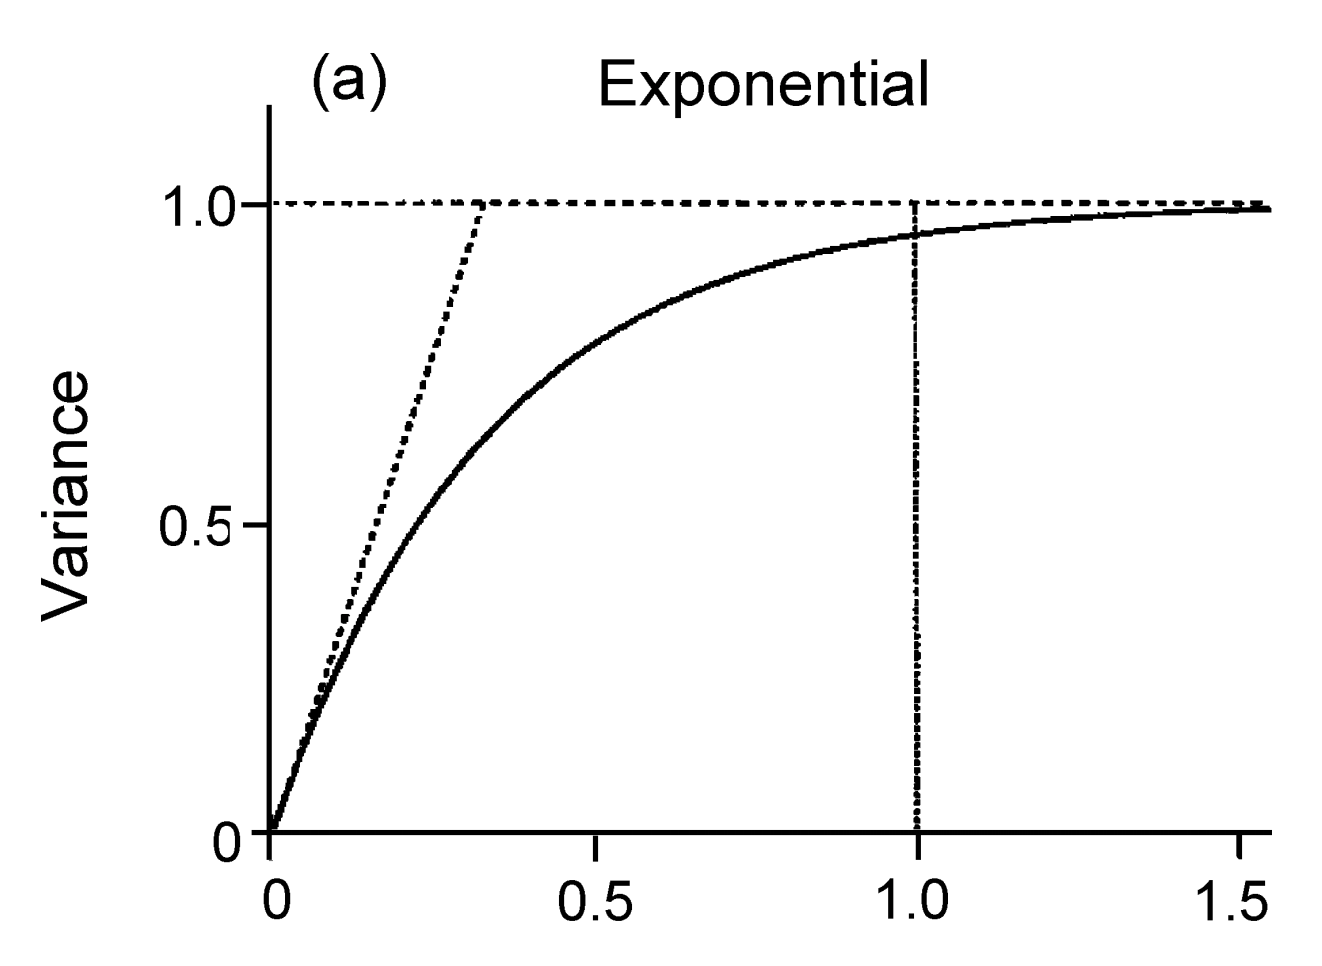

# Fitting the model to the sample semivariogram

In [332]:
import scipy.optimize

def exponential_semivariogram(h,c,tau):
    return c * (1 - np.exp(-h/tau))

popt, pcov = scipy.optimize.curve_fit(exponential_semivariogram,hd,gamma_s,bounds=([0,100],[100,10000]))
print('sill (c): %.2f' % popt[0])
print('range (tau): %.2f' % popt[1])

sill (c): 48.46
range (tau): 2205.78


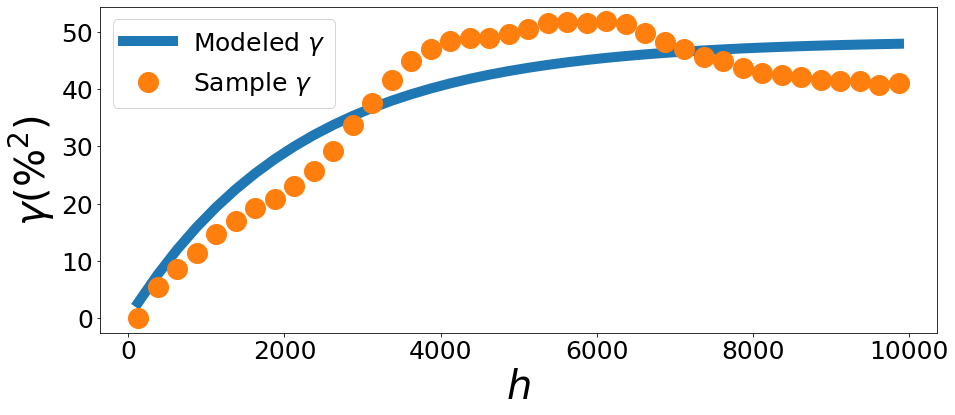

In [333]:

plt.figure(figsize=(15,6))
plt.plot(hd,exponential_semivariogram(hd,*popt),lw=10)
plt.plot(hd,gamma_s,'o',markersize=20)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.xlabel(r'$h$',fontsize=40)
plt.ylabel(r'$\gamma(\%^2)$',fontsize=40)
plt.legend([r'Modeled $\gamma$',r'Sample $\gamma$'],fontsize=25)
plt.show()

# Relationship between semivariance and covariance

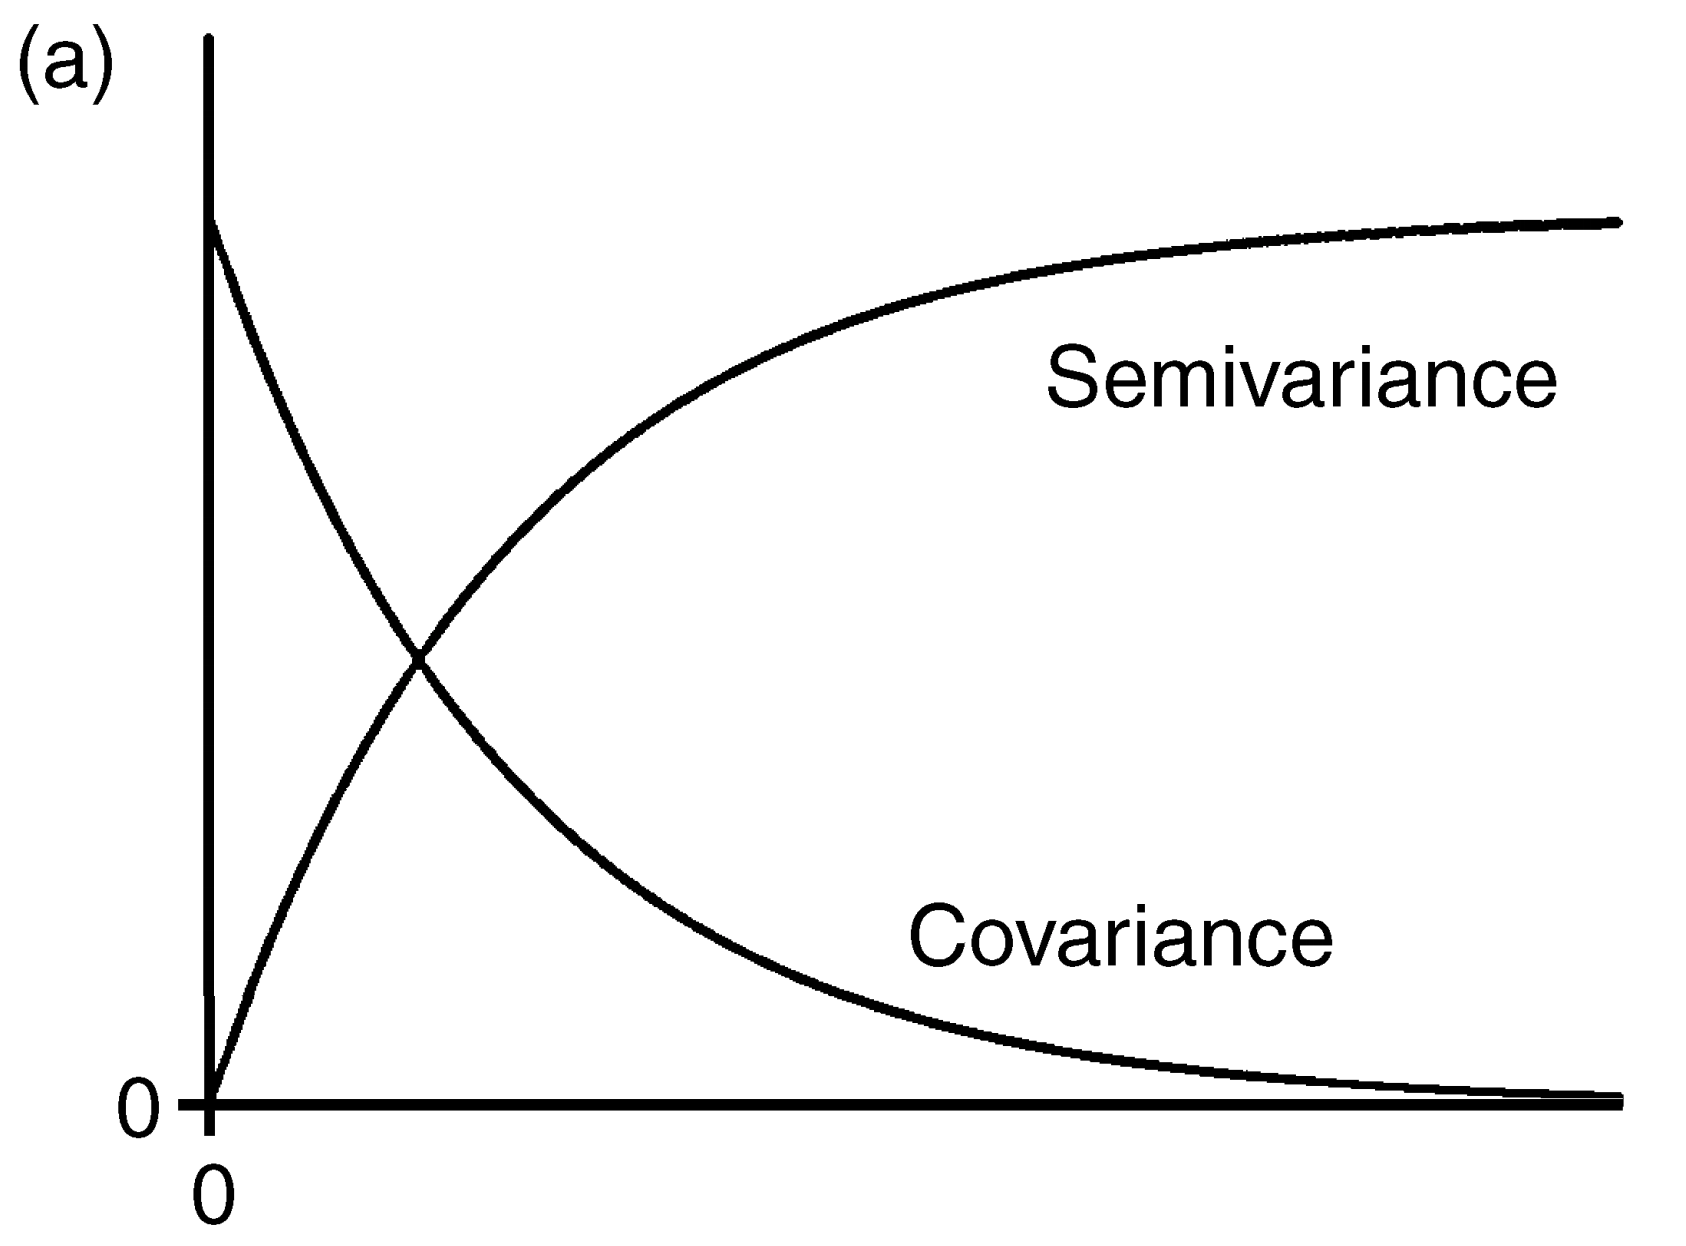

Source: Webster and Oliver, 2007

# For bounded semivariograms, there is an associated covariance function

This just means that the random field $Z$ is a second order stationary random field (i.e., constant mean and variance are constant and the covariance between two points only relies on distance). 

It allows us to define this relationship between the semivariogram and covariance:

$$\gamma(h) = C(0) - C(h)$$

In other words, if we know the model semivariogram, we know the model covariance function.

# Exponential semivariogram vs exponential covariance function

$$\gamma(h) = c\left(1 - \text{exp}\left(-\frac{h}{\tau}\right)\right)$$


$$C(h) = c\left(\text{exp}\left(-\frac{h}{\tau}\right)\right)$$

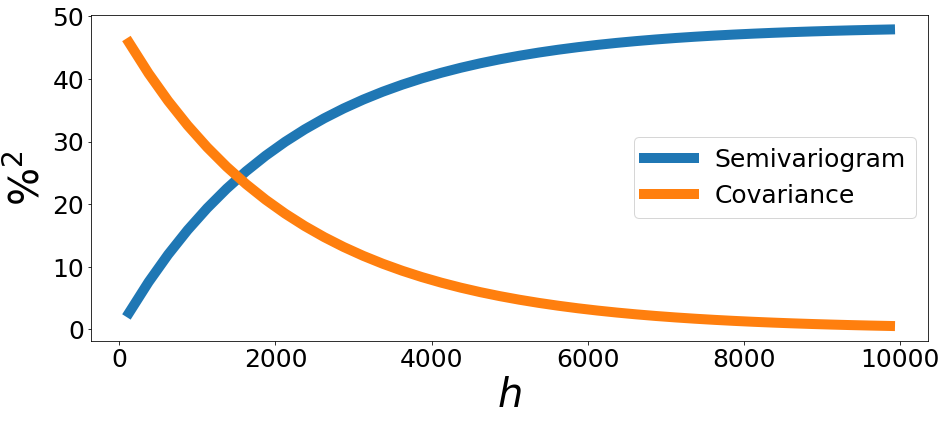

In [334]:
def exponential_covariance(h,c,tau):
    return c * (np.exp(-h/tau))

plt.figure(figsize=(15,6))
plt.plot(hd,exponential_semivariogram(hd,*popt),lw=10)
plt.plot(hd,exponential_covariance(hd,*popt),lw=10)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.xlabel(r'$h$',fontsize=40)
plt.ylabel(r'$\%^2$',fontsize=40)
plt.legend([r'Semivariogram',r'Covariance'],fontsize=25)
plt.show()

# Let's revisit our 1d problem using Ordinary kriging now

In [335]:
#Define tau
tau = popt[1]
#Define the variance for the covariance function
var = popt[0]
#Compute ystart for all missing points
ypred,msepred = [],[]
for ipoint in range(yv.size):
    (zstar,mse) = ordinary_kriging_point(tau,Xt,Xv,yt,var,ipoint)
    ypred.append(zstar)
    msepred.append(mse)
ypred = np.array(ypred)
msepred = np.array(msepred)

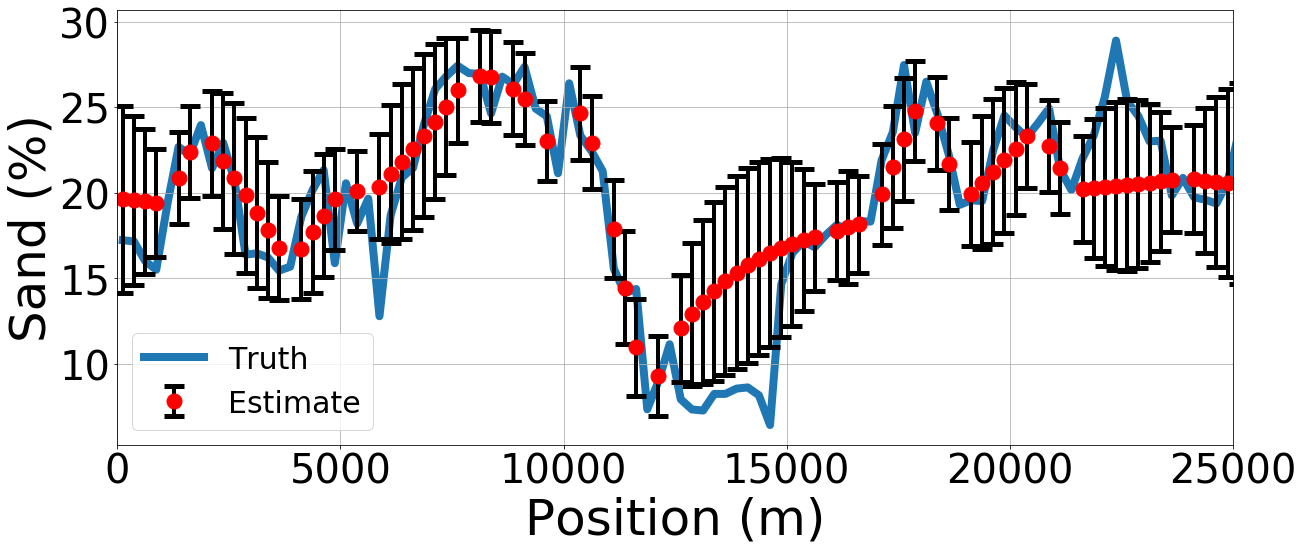

In [336]:
plt.figure(figsize=(20,8))
plt.plot(pos,data1d,lw=8,zorder=1)
argsort = np.argsort(Xv[:,0])
plt.errorbar(Xv[argsort,0],ypred[argsort],yerr=msepred[argsort]**0.5,fmt='ro',
             ecolor='k',elinewidth=4,capthick=5,capsize=10,markersize=15)
plt.xticks(fontsize=40)
plt.yticks(fontsize=40)
plt.xlabel('Position (m)',fontsize=50)
plt.ylabel('Sand (%)',fontsize=50)
plt.xlim([0,25000])
plt.title('',fontsize=50)
plt.grid('on')
plt.legend(['Truth','Estimate'],fontsize=30)
plt.show()

In [337]:
print(r'R2: %f' % sklearn.metrics.r2_score(yv,ypred))

R2: 0.659236


# What about semivariograms for 2d data?

We are going to assume isotropy, but you can create anisotropic semivariograms as well.

# Map of points

In [338]:
import xarray as xr
import numpy as np
fp = xr.open_rasterio('../Workspace/sand_0_5.tif')
data = np.array(fp[0,:,:])
y = np.array(fp['y'][:])
x = np.array(fp['x'][:])
fp.close()

In [339]:
#Let's randomly sample n different points
nsamples = int(0.1*(x.size*y.size))
#Randomly sample n points on the domain
np.random.seed(1)
(xs,ys) = np.meshgrid(np.arange(x.size),np.arange(y.size))
ipoints = np.random.choice(np.arange(x.size*y.size),nsamples,replace=False)
ix = xs.ravel()[ipoints]
iy = ys.ravel()[ipoints]
#Extract the points
y_points = y[iy]
x_points = x[ix]
#Extract the data
data_points = []
for i in range(iy.size):
    data_points.append(data[iy[i],ix[i]])
data_points = np.array(data_points)

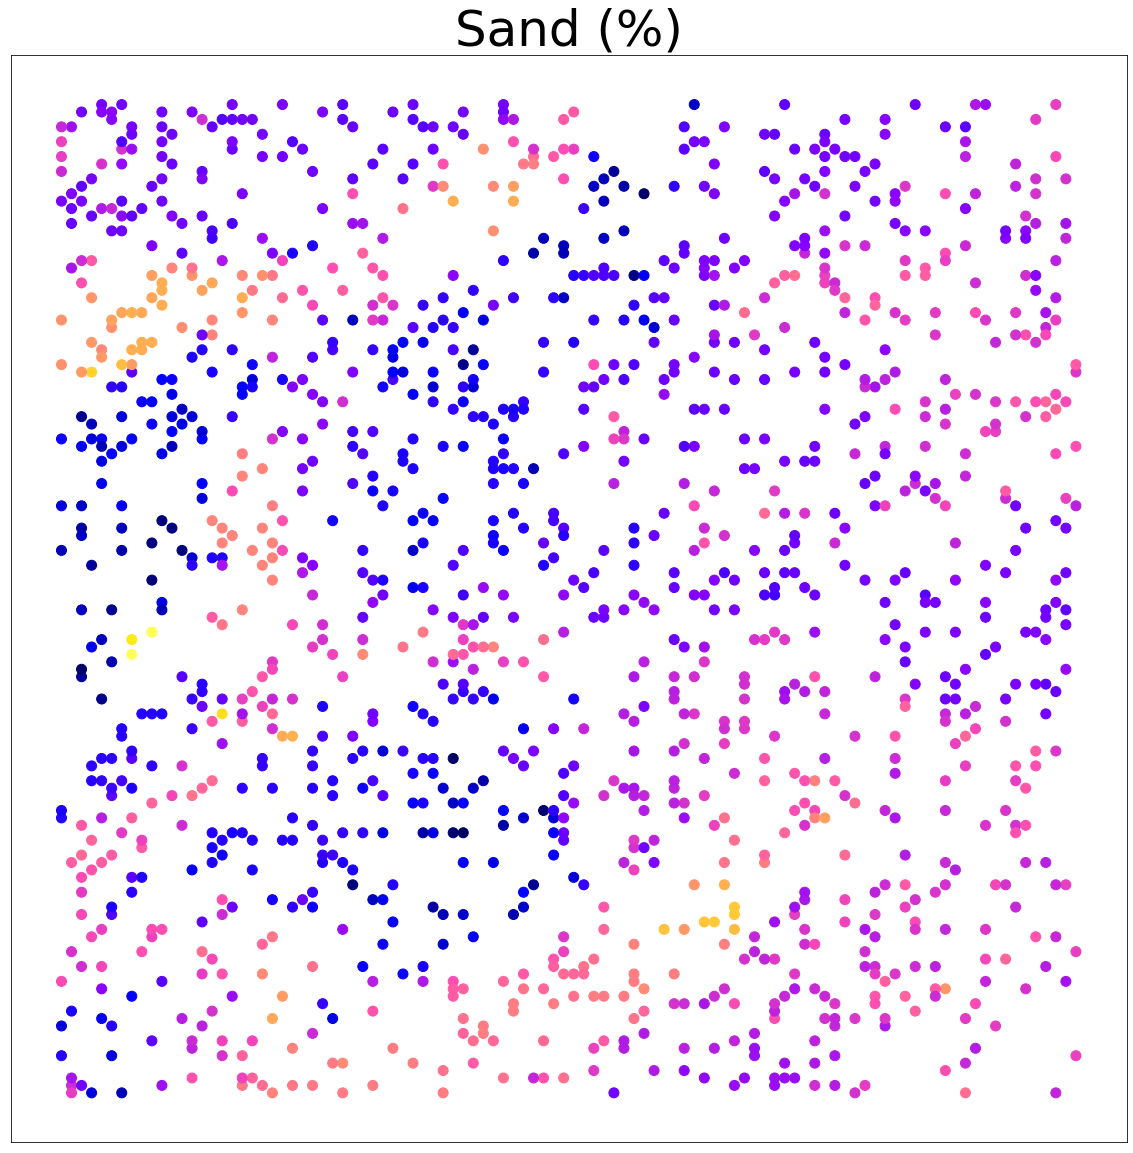

In [340]:
#Make a scatter plot of the data
plt.figure(figsize=(20,20))
plt.scatter(ix,np.max(iy)-iy,c=data_points,s=100,vmin=0,vmax=45,cmap='gnuplot2')
plt.xticks([])
plt.yticks([])
plt.title('Sand (%)',fontsize=50)
plt.show()

# Build the variogram cloud

In [341]:
#Compute euclidean distances from observatins to observations
h = ((x_points[:,np.newaxis] - x_points.T)**2 + (y_points[:,np.newaxis] - y_points.T)**2)**0.5

# Compute variogram cloud by comparing all points
gamma_c = (data_points[:,np.newaxis].T - data_points[:,np.newaxis])**2/2

#Reshape to 1d arrays
h = h.reshape(h.size)
gamma_c = gamma_c.reshape(gamma_c.size)

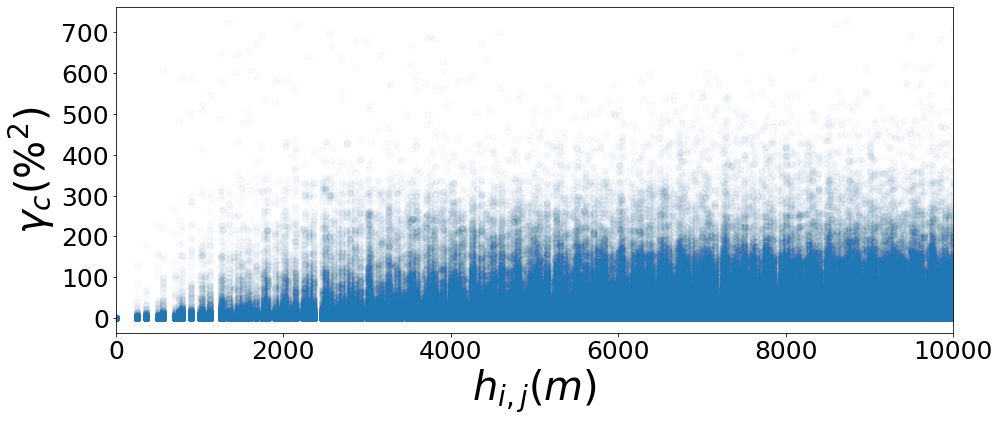

In [342]:
plt.figure(figsize=(15,6))

#Make the scatter plot
plt.scatter(h,gamma_c,alpha=0.01)

#Let's only consider points that are up to 10000 meters away from each other
plt.xlim([0,10000])

#Pretty up the plot
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.xlabel(r'$h_{i,j} (m)$',fontsize=40)
plt.ylabel(r'$\gamma_c(\%^2)$',fontsize=40)
plt.show()

# Compute sample variogram

In [343]:
#Define delta
delta = 250 #m

#Define bin edges
bin_edges = np.linspace(0,20000,20000/delta+1)

#Compute the center of each bin
hd = (bin_edges[1:] + bin_edges[0:-1])/2

#Compute sample semivariogram
gamma_s = []
for i in range(hd.size):
    if i == 0:m = (h >= bin_edges[i]) & (h < bin_edges[i+1])
    else:m = (h > bin_edges[i]) & (h <= bin_edges[i+1])
    tmp = np.mean(gamma_c[m])
    gamma_s.append(tmp)
gamma_s = np.array(gamma_s)

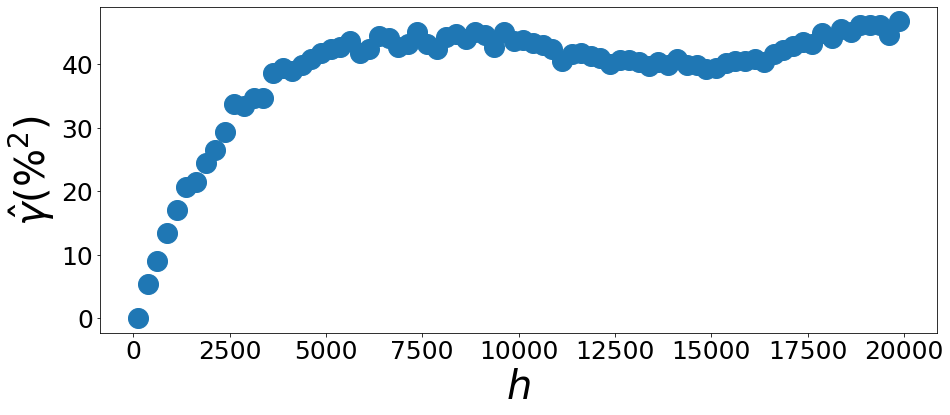

In [344]:
plt.figure(figsize=(15,6))
plt.plot(hd,gamma_s,'o',markersize=20)

plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.xlabel(r'$h$',fontsize=40)
plt.ylabel(r'$\hat{\gamma}(\%^2)$',fontsize=40)
plt.show()

# Fit an exponential semivariogram

In [345]:
popt, pcov = scipy.optimize.curve_fit(exponential_semivariogram,hd,gamma_s,bounds=([0,1000],[100,25000]))
print('sill (c): %.2f' % popt[0])
print('range (tau): %.2f' % popt[1])

sill (c): 43.02
range (tau): 1930.81


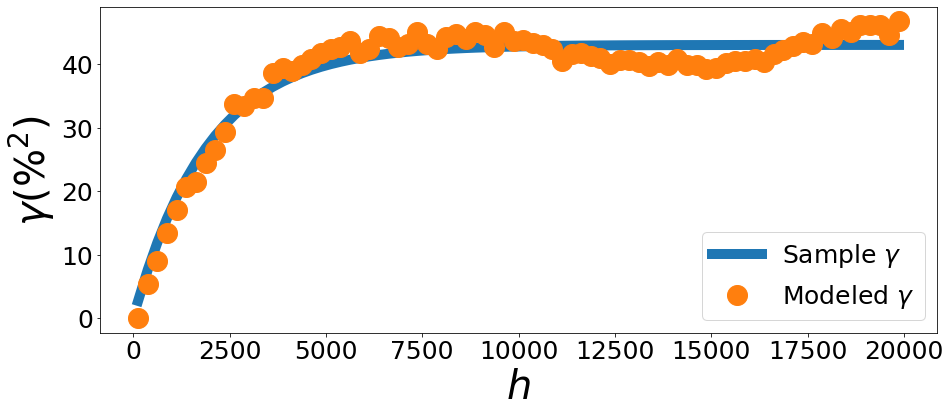

In [346]:
plt.figure(figsize=(15,6))
plt.plot(hd,exponential_semivariogram(hd,*popt),lw=10)
plt.plot(hd,gamma_s,'o',markersize=20)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.xlabel(r'$h$',fontsize=40)
plt.ylabel(r'$\gamma(\%^2)$',fontsize=40)
plt.legend([r'Sample $\gamma$',r'Modeled $\gamma$'],fontsize=25)
plt.show()

# Ordinary kriging estimate 

Using the estimate isotropic exponential covariance function

In [347]:
#Define variance
var = popt[0]
#Define tau
tau = popt[1]
#Define grid positioning
x_grid = x[xs]
y_grid = y[ys]
#Let's reshape our data to a 1d array
xg1d = x_grid.reshape(x_grid.size)
yg1d = y_grid.reshape(y_grid.size)
#Compute euclidean distances from observations to points on grid
dist = ((xg1d[:,np.newaxis] - x_points.T)**2 + (yg1d[:,np.newaxis] - y_points.T)**2)**0.5
#Compute covariance matrix C
C = var*np.exp(-dist/tau).T
#Compute euclidean distances from observatins to observations
dist = ((x_points[:,np.newaxis] - x_points.T)**2 + (y_points[:,np.newaxis] - y_points.T)**2)**0.5
#Compute covariance matrix Sigma
Sigma = var*np.exp(-dist/tau).T
#Append the extra information for the langrange multipliers
#Sigma_prime
Sigma_prime = np.zeros((Sigma.shape[0]+1,Sigma.shape[1]+1))
Sigma_prime[0:-1,0:-1] = Sigma[:]
Sigma_prime[-1,0:-1] = 1
Sigma_prime[0:-1,-1] = 1
#C_prime
C_prime = np.zeros((C.shape[0]+1,C.shape[1]))
C_prime[0:-1,:] = C[:,:]
C_prime[-1,:] = 1

In [348]:
# Solve for the weights
W = np.linalg.solve(Sigma_prime,C_prime)

In [349]:
#Compute zstar
zt = data_points[:]
zstar = np.sum(W[0:-1,:]*zt[:,np.newaxis],axis=0)
#Compute mse 
mse = var - np.sum(W[0:-1,:]*C_prime[0:-1,:],axis=0) - W[-1,:]

# Compare the kriged map to the original one

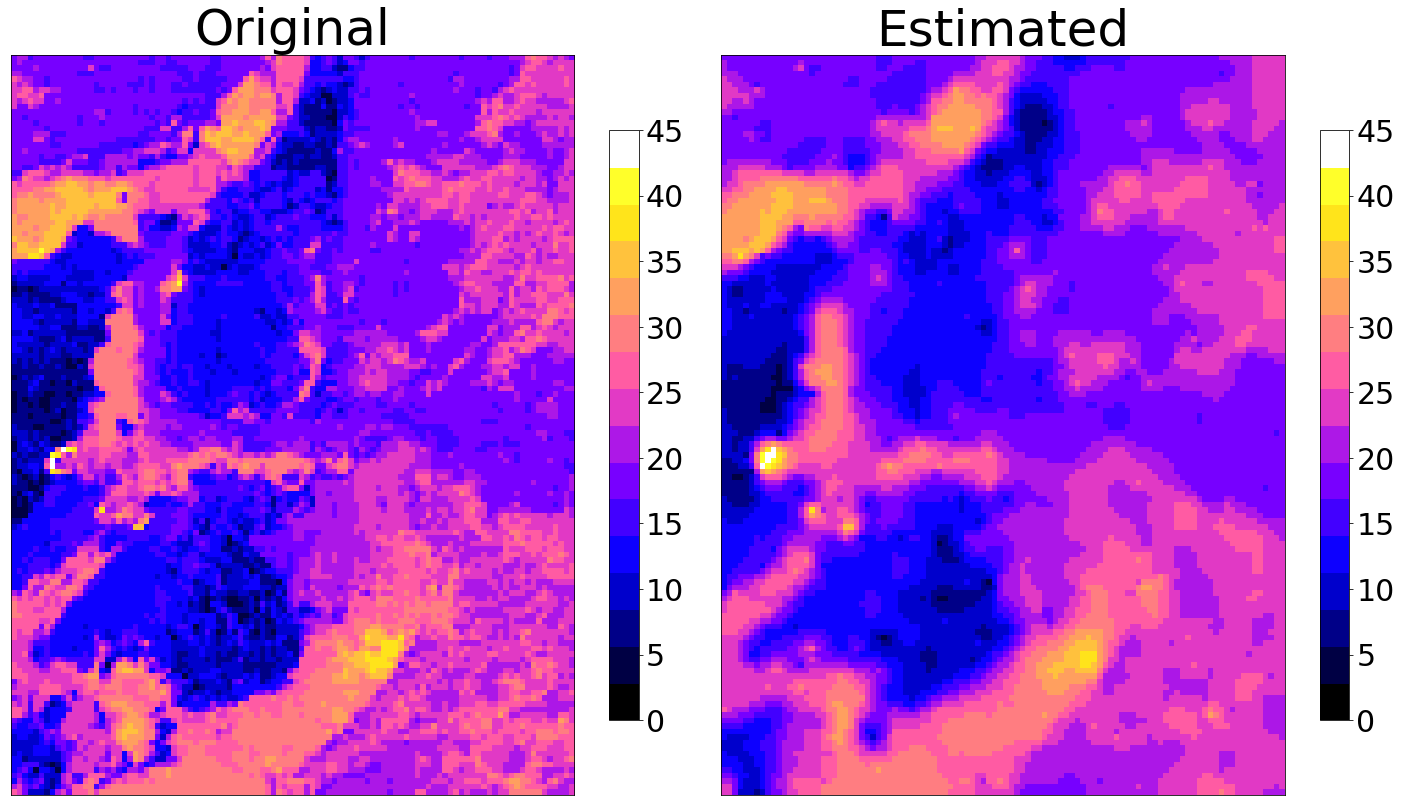

In [350]:
import matplotlib.cm as cm
vmin = 0
vmax = 45
#Plot the original and kriged data side by side
ypred = zstar.reshape(x_grid.shape)
plt.figure(figsize=(20,12))
plt.subplot(122)
plt.imshow(ypred,cmap=cm.get_cmap('gnuplot2',16),vmin=vmin,vmax=vmax)
plt.xticks([])
plt.yticks([])
plt.title('Estimated',fontsize=50)
cb = plt.colorbar(shrink=0.7)
cb.ax.tick_params(labelsize=30)
plt.subplot(121)
plt.imshow(data,cmap=cm.get_cmap('gnuplot2',16),vmin=vmin,vmax=vmax)
plt.xticks([])
plt.yticks([])
plt.title('Original',fontsize=50)
cb = plt.colorbar(shrink=0.7)
cb.ax.tick_params(labelsize=30)
plt.tight_layout()
plt.show()

In [351]:
print(r'R2: %f' % sklearn.metrics.r2_score(data.reshape(data.size),ypred.reshape(ypred.size)))

R2: 0.812924


# Kriging variance (i.e., mean squared error)

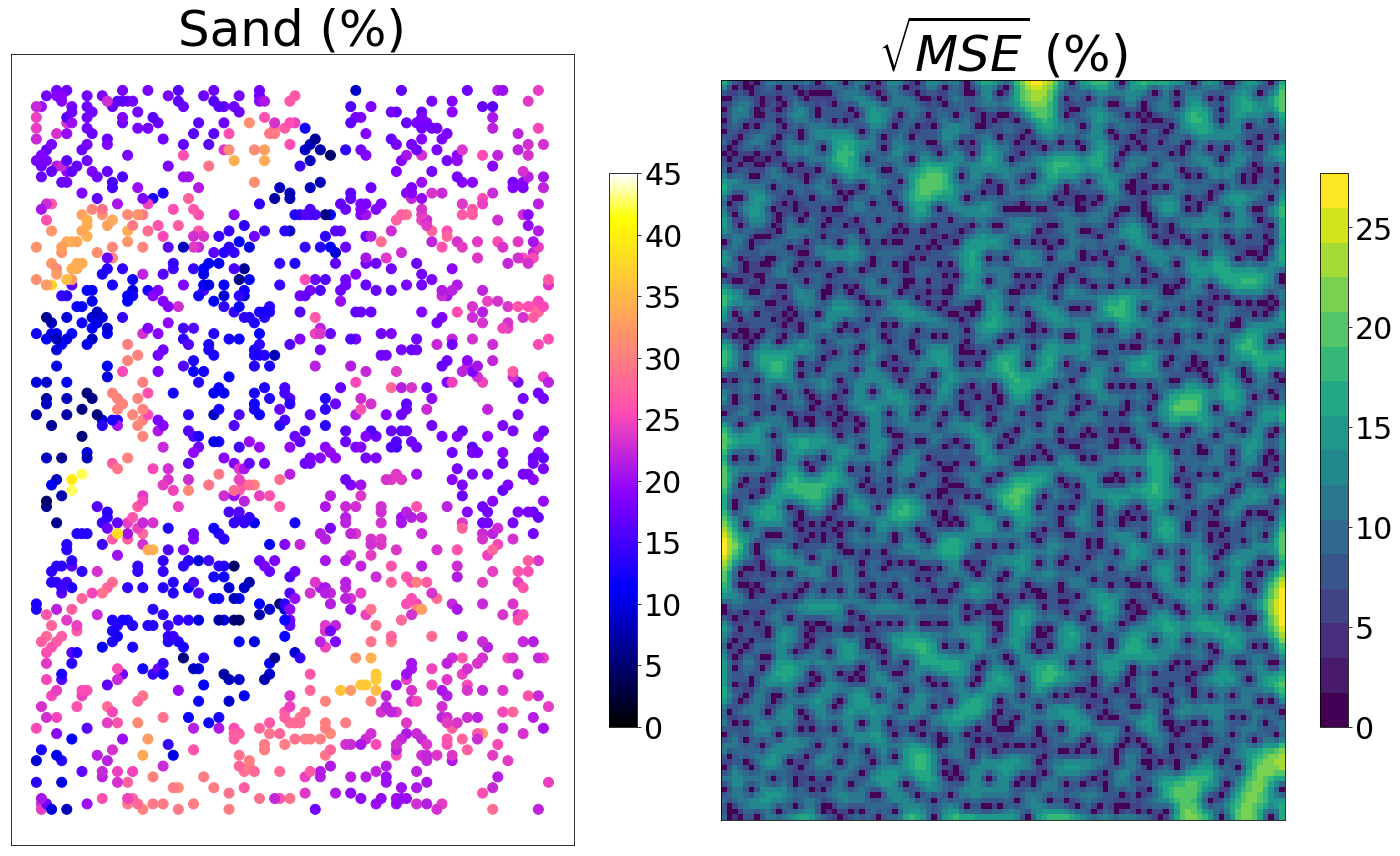

In [352]:
#Plot the original and kriged data side by side
mse_grid = mse.reshape(x_grid.shape)
plt.figure(figsize=(20,12))
plt.subplot(122)
plt.imshow(mse_grid,cmap=cm.get_cmap('viridis',16))
plt.xticks([])
plt.yticks([])
plt.title(r'$\sqrt{MSE}$ (%)',fontsize=50)
cb = plt.colorbar(shrink=0.7)
cb.ax.tick_params(labelsize=30)
plt.subplot(121)
plt.scatter(ix,np.max(iy)-iy,c=data_points,s=100,vmin=vmin,vmax=vmax,cmap='gnuplot2')
plt.xticks([])
plt.yticks([])
plt.title('Sand (%)',fontsize=50)
cb = plt.colorbar(shrink=0.7)
cb.ax.tick_params(labelsize=30)
plt.tight_layout()
plt.show()

# Issues with Kriging/Semivariogram

When the sample size is sufficiently dense, it can work great.

However, if it is too sparse, you get the bullseye effect.

# Let's take the kriging example and assume we only have 1/10 of the observations

In [353]:
#Define variance
var = popt[0]
#Define tau
tau = popt[1]
#Define grid positioning
x_grid = x[xs]
y_grid = y[ys]
#Let's reshape our data to a 1d array
xg1d = x_grid.reshape(x_grid.size)
yg1d = y_grid.reshape(y_grid.size)
#Compute euclidean distances from observations to points on grid
dist = ((xg1d[:,np.newaxis] - x_points[::10].T)**2 + (yg1d[:,np.newaxis] - y_points[::10].T)**2)**0.5
#Compute covariance matrix C
C = var*np.exp(-dist/tau).T
#Compute euclidean distances from observatins to observations
dist = ((x_points[::10,np.newaxis] - x_points[::10].T)**2 + (y_points[::10,np.newaxis] - y_points[::10].T)**2)**0.5
#Compute covariance matrix Sigma
Sigma = var*np.exp(-dist/tau).T
#Append the extra information for the langrange multipliers
#Sigma_prime
Sigma_prime = np.zeros((Sigma.shape[0]+1,Sigma.shape[1]+1))
Sigma_prime[0:-1,0:-1] = Sigma[:]
Sigma_prime[-1,0:-1] = 1
Sigma_prime[0:-1,-1] = 1
#C_prime
C_prime = np.zeros((C.shape[0]+1,C.shape[1]))
C_prime[0:-1,:] = C[:,:]
C_prime[-1,:] = 1

In [354]:
# Solve for the weights
W = np.linalg.solve(Sigma_prime,C_prime)

In [355]:
#Compute zstar
zt = data_points[:]
zstar = np.sum(W[0:-1,:]*zt[::10,np.newaxis],axis=0)
#Compute mse 
mse = var - np.sum(W[0:-1,:]*C_prime[0:-1,:],axis=0) - W[-1,:]

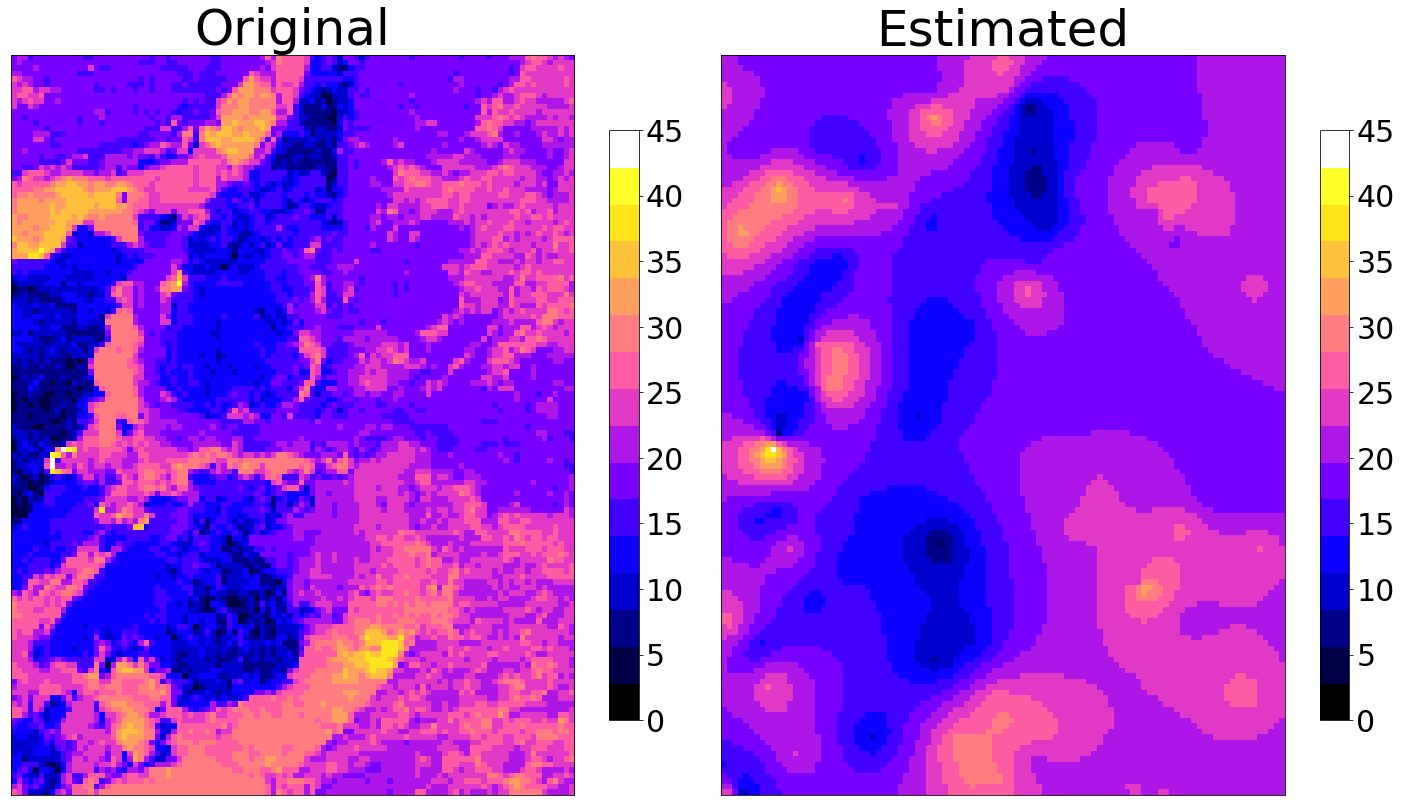

In [356]:
import matplotlib.cm as cm
vmin = 0
vmax = 45
#Plot the original and kriged data side by side
ypred = zstar.reshape(x_grid.shape)
plt.figure(figsize=(20,12))
plt.subplot(122)
plt.imshow(ypred,cmap=cm.get_cmap('gnuplot2',16),vmin=vmin,vmax=vmax)
plt.xticks([])
plt.yticks([])
plt.title('Estimated',fontsize=50)
cb = plt.colorbar(shrink=0.7)
cb.ax.tick_params(labelsize=30)
plt.subplot(121)
plt.imshow(data,cmap=cm.get_cmap('gnuplot2',16),vmin=vmin,vmax=vmax)
plt.xticks([])
plt.yticks([])
plt.title('Original',fontsize=50)
cb = plt.colorbar(shrink=0.7)
cb.ax.tick_params(labelsize=30)
plt.tight_layout()
plt.show()

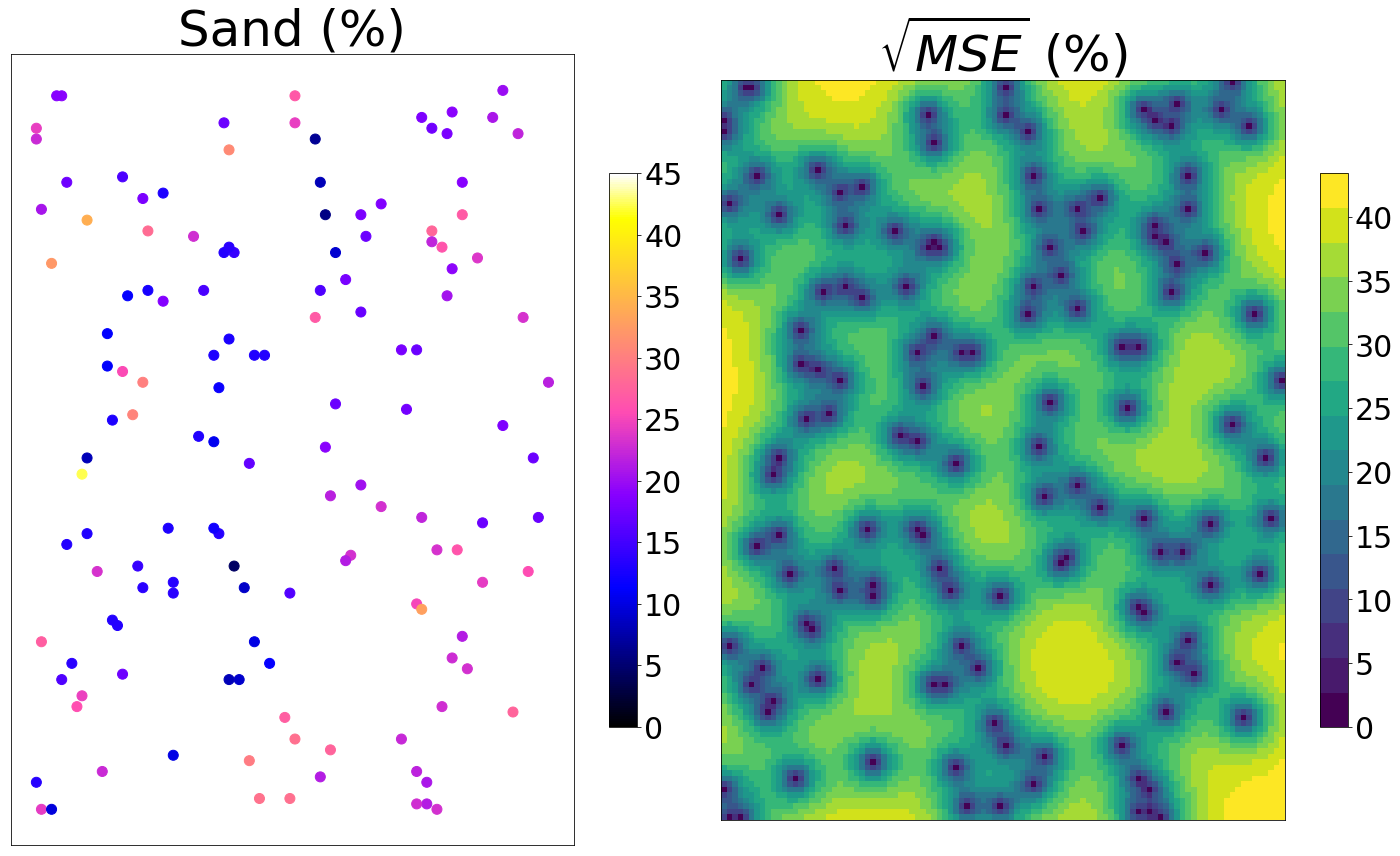

In [357]:
#Plot the original and kriged data side by side
mse_grid = mse.reshape(x_grid.shape)
plt.figure(figsize=(20,12))
plt.subplot(122)
plt.imshow(mse_grid,cmap=cm.get_cmap('viridis',16))
plt.xticks([])
plt.yticks([])
plt.title(r'$\sqrt{MSE}$ (%)',fontsize=50)
cb = plt.colorbar(shrink=0.7)
cb.ax.tick_params(labelsize=30)
plt.subplot(121)
plt.scatter(ix[::10],np.max(iy)-iy[::10],c=data_points[::10],s=100,vmin=vmin,vmax=vmax,cmap='gnuplot2')
plt.xticks([])
plt.yticks([])
plt.title('Sand (%)',fontsize=50)
cb = plt.colorbar(shrink=0.7)
cb.ax.tick_params(labelsize=30)
plt.tight_layout()
plt.show()

# Next Tuesday: Regression Kriging and Conditional Simulations